In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train #label, in first image no. is 5

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

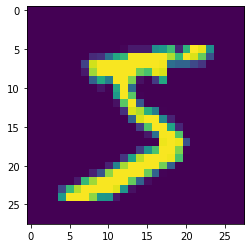

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
# in all images no. r between 0 to 255, & its imp to bring all no. in similar range from 0 to 1
#  so we will div by 255

X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0] # all array will be in range of 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

an image is having 784 pixel 28 * 28 rows*col, and we have to bring all rows by rows in one row 1,784 & this can be done by flattening, convert 2d into 1d

In [22]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) # whenever in o/p we have more than 1 nodes then we use softmax, here we have 10 o/p nodes

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
784*128+128 # 784 i/p layer multiply by 128 nodes of hidden layer 1, and addition of 128 bias

100480

In [31]:
128*10+10

1290

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [27]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2907 - val_loss: 0.1657
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1292 - val_loss: 0.1208
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0870 - val_loss: 0.1034
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0651 - val_loss: 0.0880
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0494 - val_loss: 0.0906
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0392 - val_loss: 0.0849
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0310 - val_loss: 0.0859
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0258 - val_loss: 0.0953
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0193 - val_loss: 0.0943
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0

In [28]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 3ms/step


array([[6.1327735e-11, 8.8569353e-11, 1.8910660e-08, ..., 9.9999684e-01,
        4.4407602e-09, 5.6403845e-08],
       [2.2839763e-11, 3.6651178e-07, 9.9999958e-01, ..., 3.2987962e-22,
        1.3421537e-10, 1.3527677e-18],
       [4.1470333e-08, 9.9924266e-01, 2.6850323e-05, ..., 5.9553004e-05,
        4.4872338e-04, 3.3472489e-08],
       ...,
       [9.6002896e-18, 2.4945039e-13, 6.0470046e-17, ..., 1.4501754e-08,
        8.7723189e-09, 2.6580213e-07],
       [4.9060663e-13, 9.7507120e-11, 2.0478051e-15, ..., 3.1676913e-13,
        1.5591735e-06, 2.2073344e-13],
       [2.5899483e-10, 9.4141925e-14, 4.8660621e-11, ..., 1.0887439e-17,
        5.5911271e-13, 6.4361792e-14]], dtype=float32)

In [29]:
y_pred = y_prob.argmax(axis=1) # to find max no. from each array
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,y_pred) #y_test= actual data ,y_pred = model prediction

0.9749

to improve more accuracy

In [32]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.1710 - val_accuracy: 0.9714
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.1785 - val_accuracy: 0.9723
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.1826 - val_accuracy: 0.9725
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1688 - val_accuracy: 0.9739
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.1614 - val_accuracy: 0.9772
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1839 - val_accuracy: 0.9729
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.1689 - val_accurac

In [39]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[6.43083909e-26, 2.64905217e-21, 2.31604730e-24, ...,
        9.99999940e-01, 1.35751113e-29, 1.86265152e-16],
       [1.20580663e-23, 6.76301217e-15, 9.99999940e-01, ...,
        1.01463125e-32, 1.17001981e-22, 0.00000000e+00],
       [9.94742364e-15, 9.99999940e-01, 2.75215042e-11, ...,
        1.83168203e-10, 3.37979811e-10, 5.49400757e-17],
       ...,
       [1.13671605e-37, 2.83438945e-33, 0.00000000e+00, ...,
        4.51575593e-29, 3.87919668e-24, 2.18510460e-19],
       [1.95680412e-33, 2.35113846e-31, 6.93526470e-29, ...,
        1.81042458e-33, 2.40421073e-12, 4.83812995e-34],
       [2.31841927e-29, 1.70789199e-36, 0.00000000e+00, ...,
        0.00000000e+00, 7.16779318e-28, 0.00000000e+00]], dtype=float32)

In [40]:
y_pred = y_prob.argmax(axis=1) 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,y_pred)

0.9775

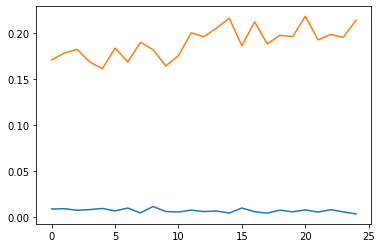

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

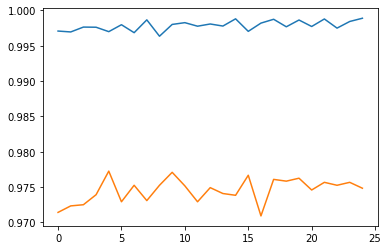

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

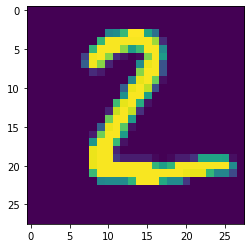

In [44]:
plt.imshow(X_test[1]) #original image

In [46]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) # in original image number is 2 and we have also got 2

1/1 [==============================] - 0s 35ms/step


array([2])

In [45]:
model.predict(X_test[1].reshape(1,28,28))

1/1 [==============================] - 0s 36ms/step


array([[1.2058021e-23, 6.7629872e-15, 1.0000000e+00, 1.6374250e-17,
        4.4175918e-32, 2.0403373e-31, 2.0611102e-28, 1.0146313e-32,
        1.1700155e-22, 0.0000000e+00]], dtype=float32)

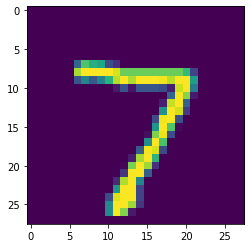

In [47]:
plt.imshow(X_test[0]) #original image

In [48]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([7])